<a href="https://colab.research.google.com/github/osmarbraz/exemplos_BERT/blob/main/Exemplos_Introducao_BERT_WordEmbeddings_en.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#BERT Word Embeddings en usando Transformers(v2) by HuggingFace

**Artigo Original:**
http://mccormickml.com/2019/05/14/BERT-word-embeddings-tutorial/

**Notebook Original:**
https://colab.research.google.com/drive/1ZQvuAVwA3IjybezQOXnrXMGAnMyZRuPU


In this post, I take an in-depth look at word embeddings produced by Google's BERT and show you how to get started with BERT by producing your own word embeddings.

This post is presented in two forms--as a blog post [here](http://mccormickml.com/2019/05/14/BERT-word-embeddings-tutorial/) and as a Colab notebook [here](https://colab.research.google.com/drive/1ZQvuAVwA3IjybezQOXnrXMGAnMyZRuPU). 
The content is identical in both, but: 

* The blog post format may be easier to read, and includes a comments section for discussion. 
* The Colab Notebook will allow you to run the code and inspect it as you read through.

------------------

Nesta postagem, eu examino detalhadamente as combinações de palavras produzidas pelo BERT do Google e mostro como começar com o BERT produzindo suas próprias combinações de palavras.

Esta postagem é apresentada em duas formas - como uma postagem no blog [aqui](http://mccormickml.com/2019/05/14/BERT-word-embeddings-tutorial/) e como um notebook da Colab [aqui](https://colab.research.google.com/drive/1ZQvuAVwA3IjybezQOXnrXMGAnMyZRuPU).
O conteúdo é idêntico em ambos, mas:

* O formato da postagem do blog pode ser mais fácil de ler e inclui uma seção de comentários para discussão.
* O Notebook Colab permitirá que você execute o código e inspecione enquanto lê.


# Introduction



### History

2018 was a breakthrough year in NLP. Transfer learning, particularly models like Allen AI's ELMO, OpenAI's Open-GPT, and Google's BERT allowed researchers to smash multiple benchmarks with minimal task-specific fine-tuning and provided the rest of the NLP community with pretrained models that could easily (with less data and less compute time) be fine-tuned and implemented to produce state of the art results. Unfortunately, for many starting out in NLP and even for some experienced practicioners, the theory and practical application of these powerful models is still not well understood.

-------------------

2018 foi um ano inovador na PNL. A transferência de aprendizado, particularmente modelos como o ELMO de Allen AI, o Open-GPT da OpenAI e o BERT do Google, permitiu que os pesquisadores quebrassem vários benchmarks com o mínimo de ajuste fino específico da tarefa e forneceu ao restante da comunidade da PNL modelos pré-treinados que poderiam facilmente (com menos dados) e menos tempo de computação) sejam ajustados e implementados para produzir resultados de última geração. Infelizmente, para muitos iniciantes na PNL e mesmo para alguns praticantes experientes, a teoria e a aplicação prática desses poderosos modelos ainda não são bem conhecidas.



### What is BERT?

BERT (Bidirectional Encoder Representations from Transformers), released in late 2018, is the model we will use in this tutorial to provide readers with a better understanding of and practical guidance for using transfer learning models in NLP. BERT is a method of pretraining language representations that was used to create models that NLP practicioners can then download and use for free. You can either use these models to extract high quality language features from your text data, or you can fine-tune these models on a specific task (classification, entity recognition, question answering, etc.) with your own data to produce state of the art predictions.

-----------------

O BERT (Representações de codificadores bidirecionais da Transformers), lançado no final de 2018, é o modelo que usaremos neste tutorial para fornecer aos leitores uma melhor compreensão e orientação prática para o uso de modelos de aprendizado de transferência na PNL. O BERT é um método de pré-treinamento de representações da linguagem que foi usado para criar modelos que os profissionais da PNL podem baixar e usar gratuitamente. Você pode usar esses modelos para extrair recursos de linguagem de alta qualidade dos dados de texto ou ajustá-los em uma tarefa específica (classificação, reconhecimento de entidade, resposta a perguntas etc.) com seus próprios dados para produzir o estado do previsões de arte.


### Why BERT embeddings?

In this tutorial, we will use BERT to extract features, namely word and sentence embedding vectors, from text data. What can we do with these word and sentence embedding vectors? First, these embeddings are useful for keyword/search expansion, semantic search and information retrieval. For example, if you want to match customer questions or searches against already answered questions or well documented searches, these representations will help you accuratley retrieve results matching the customer's intent and contextual meaning, even if there's no keyword  or phrase overlap.

Second, and perhaps more importantly, these vectors are used as high-quality feature inputs to downstream models. NLP models such as LSTMs or CNNs require inputs in the form of numerical vectors, and this typically means translating features like the vocabulary and parts of speech into numerical representations. In the past, words have been represented either as uniquely indexed values (one-hot encoding), or more helpfully as neural word embeddings where vocabulary words are matched against the fixed-length feature embeddings that result from models like Word2Vec or Fasttext. BERT offers an advantage over models like Word2Vec, because while each word has a fixed representation under Word2Vec regardless of the context within which the word appears, BERT produces word representations that are dynamically informed by the words around them. For example, given two sentences:

* "The man was accused of robbing a bank."
* "The man went fishing by the bank of the river."

Word2Vec would produce the same word embedding for the word "bank" in both sentences, while under BERT the word embedding for "bank" would be different for each sentence. Aside from capturing obvious differences like polysemy, the context-informed word embeddings capture other forms of information that result in more accurate feature representations, which in turn results in better model performance.

From an educational standpoint, a close examination of BERT word embeddings is a good way to get  your feet wet with BERT and its family of transfer learning models, and sets us up with some practical knowledge and context to better understand the inner details of the model in later tutorials.

Onward!

---------------------------

Neste tutorial, usaremos o BERT para extrair recursos, como vetores de incorporação de palavras e frases, a partir de dados de texto. O que podemos fazer com esses vetores de incorporação de palavras e frases? Primeiro, essas incorporações são úteis para a expansão de palavras-chave / pesquisa, pesquisa semântica e recuperação de informações. Por exemplo, se você deseja comparar perguntas ou pesquisas do cliente com perguntas já respondidas ou pesquisas bem documentadas, essas representações o ajudarão a recuperar com precisão os resultados correspondentes à intenção e ao significado contextual do cliente, mesmo se não houver sobreposição de palavra-chave ou frase.

Segundo, e talvez mais importante, esses vetores são usados ​​como entradas de recursos de alta qualidade para modelos posteriores. Modelos de PNL, como LSTMs ou CNNs, exigem entradas na forma de vetores numéricos, e isso normalmente significa traduzir recursos como o vocabulário e partes do discurso em representações numéricas. No passado, as palavras eram representadas como valores indexados exclusivamente (codificação one-hot), ou mais útil como incorporação de palavras neurais em que as palavras do vocabulário são comparadas com as incorporação de recursos de comprimento fixo resultantes de modelos como Word2Vec ou Fasttext. O BERT oferece uma vantagem sobre modelos como o Word2Vec, porque, embora cada palavra tenha uma representação fixa no Word2Vec, independentemente do contexto em que a palavra aparece, o BERT produz representações de palavras que são dinamicamente informadas pelas palavras ao seu redor. Por exemplo, dadas duas frases:

* "The man was accused of robbing a bank."
* "The man went fishing by the bank of the river."

traduzido

* "O homem foi acusado de assaltar um banco."
* "O homem foi pescar na margem(banco) do rio."

O Word2Vec produziria a mesma palavra incorporação para a palavra "banco" em ambas as frases, enquanto em BERT a palavra incorporação para "banco" seria diferente para cada frase. Além de capturar diferenças óbvias como a polissemia, as inserções de palavras informadas pelo contexto capturam outras formas de informação que resultam em representações de recursos mais precisas, o que, por sua vez, resulta em melhor desempenho do modelo.

Do ponto de vista educacional, um exame atento das combinações de palavras do BERT é uma boa maneira de se molhar com o BERT e sua família de modelos de aprendizado de transferência, além de estabelecer alguns conhecimentos e contextos práticos para entender melhor os detalhes internos do modelo em tutoriais posteriores.

Avante!

## Preparação do ambiente
Preparação do ambiente para análise e tratamento de perguntas

###Tratamento de logs

In [ ]:
# Biblioteca de logging
import logging

# Formatando a mensagem de logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

### Identificando o ambiente Colab

In [ ]:
# Se estiver executando no Google Colaboratory
import sys

# Retorna true ou false se estiver no Google Colaboratory
IN_COLAB = 'google.colab' in sys.modules

# 1. Loading Pre-Trained BERT

Install the pytorch interface for BERT by Hugging Face. (This library contains interfaces for other pretrained language models like OpenAI's GPT and GPT-2.) 

We've selected the pytorch interface because it strikes a nice balance between the high-level APIs (which are easy to use but don't provide insight into how things work) and tensorflow code (which contains lots of details but often sidetracks us into lessons about tensorflow, when the purpose here is BERT!).

If you're running this code on Google Colab, you will have to install this library each time you reconnect; the following cell will take care of that for you.

------------------------

Instale a interface pytorch para o BERT by Hugging Face. (Esta biblioteca contém interfaces para outros modelos de linguagem pré-treinados, como o GPT e o GPT-2 da OpenAI.)

Selecionamos a interface pytorch porque ela encontra um bom equilíbrio entre as APIs de alto nível (que são fáceis de usar, mas não fornecem informações sobre como as coisas funcionam) e o código do tensorflow (que contém muitos detalhes, mas muitas vezes nos desvia lições sobre o fluxo tensor, quando o objetivo aqui é o BERT!).

Se você estiver executando esse código no Google Colab, precisará instalar esta biblioteca sempre que se reconectar; a célula a seguir cuidará disso para você.

In [ ]:
!pip install transformers

Now let's import pytorch, the pretrained BERT model, and a BERT tokenizer. We'll explain the BERT model in detail in a later tutorial, but this is the pre-trained model released by Google that ran for many, many hours on Wikipedia and [Book Corpus](https://arxiv.org/pdf/1506.06724.pdf), a dataset containing +10,000 books of different genres. This model is responsible (with a little modification) for beating NLP benchmarks across a range of tasks. Google released a few variations of BERT models, but the one we'll use here is the smaller of the two available sizes ("base" and "large") and ignores casing, hence "uncased.""

------------------------

Agora vamos importar pytorch, o modelo pré-treinado BERT e um tokenizer BERT. Explicaremos o modelo BERT em detalhes em um tutorial posterior, mas este é o modelo pré-treinado lançado pelo Google, que funcionou por muitas e muitas horas na Wikipedia e no [Book Corpus](https://arxiv.org/pdf/1506.06724.pdf), um conjunto de dados contendo 10.000 livros de diferentes gêneros. Esse modelo é responsável (com uma pequena modificação) por superar os benchmarks de PNL em várias tarefas. O Google lançou algumas variações dos modelos BERT, mas o que usaremos aqui é o menor dos dois tamanhos disponíveis ("base" e "large") e ignora o maiúscula e minúsculo, portanto, "uncased". "

Por default(`do_lower_case=True`) todas as letras são colocadas para minúsculas. Para ignorar a conversão para minúsculo use o parâmetro `do_lower_case=False`.

In [ ]:
from transformers import BertTokenizer

# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# 2. Input Formatting

Because BERT is a pretrained model that expects input data in a specific format, we will need:

- special tokens to mark the beginning ([CLS]) and separation/end of sentences ([SEP])
- tokens that conforms with the fixed vocabulary used in BERT
- token IDs from BERT's tokenizer
- mask IDs to indicate which elements in the sequence are tokens and which are padding elements
- segment IDs used to distinguish different sentences
- positional embeddings used to show token position within the sequence

Luckily, this interface takes care of some of these input specifications for us so we will only have to manually create a few of them (we'll revisit the other inputs in another tutorial).

---------------------------------------

Como o BERT é um modelo pré-treinado que espera dados de entrada em um formato específico, precisaremos de:

- tokens especiais para marcar o início ([CLS]) e a separação / final de frases ([SEP])
- tokens em conformidade com o vocabulário fixo usado no BERT
- IDs de token do tokenizer da BERT
- mascarar IDs para indicar quais elementos na sequência são tokens e quais são elementos de preenchimento
- IDs de segmento usados para distinguir frases diferentes
- inserções posicionais usadas para mostrar a posição do token dentro da sequência

Felizmente, essa interface cuida de algumas dessas especificações de entrada para nós, portanto, teremos apenas que criar manualmente algumas delas (revisitaremos as outras entradas em outro tutorial).



## 2.1. Special Tokens
BERT can take as input either one or two sentences, and expects special tokens to mark the beginning and end of each one:

**2 Sentence Input**:

`[CLS] The man went to the store. [SEP] He bought a gallon of milk. [SEP]`

**1 Sentence Input**:

`[CLS] The man went to the store. [SEP]`

-----------------

O BERT pode receber como entrada uma ou duas frases e espera que tokens especiais marquem o início e o fim de cada uma:

**Entrada de 2 frases**:

`[CLS] The man went to the store. [SEP] He bought a gallon of milk. [SEP]`

**Entrada de 1 frase**:

`[CLS] The man went to the store. [SEP]`



## 2.2. Tokenization

BERT provides its own tokenizer, which we imported above. Let's see how it handles the below sentence.

------------------------

O BERT fornece seu próprio tokenizer, que nós importamos acima. Vamos ver como ele lida com a frase abaixo.

In [ ]:
text = "Here is the sentence I want embeddings for."
marked_text = "[CLS] " + text + " [SEP]"

# Tokenize our sentence with the BERT tokenizer.
tokenized_text = tokenizer.tokenize(marked_text)

# Print out the tokens.
print (tokenized_text)

['[CLS]', 'here', 'is', 'the', 'sentence', 'i', 'want', 'em', '##bed', '##ding', '##s', 'for', '.', '[SEP]']


Notice how the word "embeddings" is represented:

`['em', '##bed', '##ding', '##s']`

The original word has been split into smaller subwords and characters. The two hash signs preceding some of these subwords are just our tokenizer's way to denote that this subword or character is part of a larger word and preceded by another subword. So, for example, the '##bed' token is separate from the 'bed' token; the first is used whenever the subword 'bed' occurs within a larger word and the second is used explicitly for when the standalone token 'thing you sleep on' occurs.

Why does it look this way? This is because the BERT tokenizer was created with a WordPiece model. This model greedily creates a fixed-size vocabulary of individual characters, subwords, and words that best fits our language data. Since the vocabulary limit size of our BERT tokenizer model is 30,000, the WordPiece model generated a vocabulary that contains all English characters plus the ~30,000 most common words and subwords found in the English language corpus the model is trained on. This vocabulary contains four things:

1. Whole words
2. Subwords occuring at the front of a word or in isolation ("em" as in "embeddings" is assigned the same vector as the standalone sequence of characters "em" as in "go get em" )
3. Subwords not at the front of a word, which are preceded by '##' to denote this case
4. Individual characters

To tokenize a word under this model, the tokenizer first checks if the whole word is in the vocabulary. If not, it tries to break the word into the largest possible subwords contained in the vocabulary, and as a last resort will decompose the word into individual characters. Note that because of this, we can always represent a word as, at the very least, the collection of its individual characters.

As a result, rather than assigning out of vocabulary words to a catch-all token like 'OOV' or 'UNK,' words that are not in the vocabulary are decomposed into subword and character tokens that we can then generate embeddings for. 

So, rather than assigning "embeddings" and every other out of vocabulary word to an overloaded unknown vocabulary token, we split it into subword tokens ['em', '##bed', '##ding', '##s'] that will retain some of the contextual meaning of the original word.  We can even average these subword embedding vectors to generate an approximate vector for the original word.


(For more information about WordPiece, see the [original paper](https://static.googleusercontent.com/media/research.google.com/en//pubs/archive/37842.pdf) and further disucssion in Google's [Neural Machine Translation System](https://arxiv.org/pdf/1609.08144.pdf).)

-------------------------

Observe como a palavra "incorporação" é representada:

`['em', '##bed', '## ding', '## s']`

A palavra original foi dividida em subpalavras e caracteres menores. Os dois sinais de hash que precedem algumas dessas subpalavras são apenas a maneira do nosso tokenizer de indicar que essa subpalavra ou caractere é parte de uma palavra maior e precedida por outra subpalavra. Portanto, por exemplo, o token '## bed' é separado do token 'bed'; o primeiro é usado sempre que a subpalavra 'cama' ocorre em uma palavra maior e o segundo é explicitamente usado quando ocorre o token autônomo 'coisa em que você dorme'.

Por que parece assim? Isso ocorre porque o tokenizer BERT foi criado com um modelo do WordPiece. Esse modelo cria avidamente um vocabulário de tamanho fixo de caracteres, subpalavras e palavras individuais que melhor se ajustam aos nossos dados de idioma. Como o tamanho limite do vocabulário do nosso modelo de tokenizador BERT é 30.000, o modelo WordPiece gerou um vocabulário que contém todos os caracteres em inglês, além das ~ 30.000 palavras e subpalavras mais comuns encontradas no corpus em que o modelo é treinado. Este vocabulário contém quatro coisas:

1. Palavras inteiras
2. As subpalavras que ocorrem na frente de uma palavra ou isoladamente ("em" como em "incorporação" recebem o mesmo vetor que a sequência autônoma de caracteres "em" como em "vá buscar")
3. Subpalavras que não estão na frente de uma palavra, precedidas por '##' para denotar este caso
4. Caracteres individuais

Para tokenizar uma palavra nesse modelo, o tokenizador primeiro verifica se a palavra inteira está no vocabulário. Caso contrário, ele tenta dividir a palavra nas maiores subpalavras possíveis contidas no vocabulário e, como último recurso, decompõe a palavra em caracteres individuais. Observe que, por isso, sempre podemos representar uma palavra como, no mínimo, a coleção de seus caracteres individuais.

Como resultado, em vez de atribuir palavras do vocabulário a um token genérico como 'OOV' ou 'UNK', palavras que não estão no vocabulário são decompostas em subpalavras e tokens de caracteres para os quais podemos gerar incorporações.

Portanto, em vez de atribuir "incorporações" e todas as outras palavras do vocabulário a um token de vocabulário desconhecido sobrecarregado, dividimos em tokens de subpalavras ['em', '## bed', '## ding', '## s' ] que reterão parte do significado contextual da palavra original. Podemos até calcular a média desses vetores de incorporação de subpalavras para gerar um vetor aproximado para a palavra original.


(Para obter mais informações sobre o WordPiece, consulte o [artigo original](https://static.googleusercontent.com/media/research.google.com/en//pubs/archive/37842.pdf) e mais perguntas sobre o sistema do Google [Neural Machine Translation System](https://arxiv.org/pdf/1609.08144.pdf).)


Here are some examples of the tokens contained in our vocabulary. Tokens beginning with two hashes are subwords or individual characters.

*For an exploration of the contents of BERT's vocabulary, see [this notebook](https://colab.research.google.com/drive/1fCKIBJ6fgWQ-f6UKs7wDTpNTL9N-Cq9X) I created and the accompanying YouTube video [here](https://youtu.be/zJW57aCBCTk).*

----------------------------

Aqui estão alguns exemplos dos tokens contidos em nosso vocabulário. Os tokens iniciados com dois hashes são subpalavras ou caracteres individuais.

*Para uma exploração do conteúdo do vocabulário do BERT, consulte [este notebook](https://colab.research.google.com/drive/1fCKIBJ6fgWQ-f6UKs7wDTpNTL9N-Cq9X) que criei e o vídeo do YouTube que o acompanha [aqui](https://youtu.be/zJW57aCBCTk).*

In [ ]:
list(tokenizer.vocab.keys())[5000:5020]

['knight',
 'lap',
 'survey',
 'ma',
 '##ow',
 'noise',
 'billy',
 '##ium',
 'shooting',
 'guide',
 'bedroom',
 'priest',
 'resistance',
 'motor',
 'homes',
 'sounded',
 'giant',
 '##mer',
 '150',
 'scenes']

After breaking the text into tokens, we then have to convert the sentence from a list of strings to a list of vocabulary indeces.

From here on, we'll use the below example sentence, which contains two instances of the word "bank" with different meanings.

-----------------------

Depois de dividir o texto em tokens, precisamos converter a sentença de uma lista de strings para uma lista de indeces de vocabulário.

A partir daqui, usaremos a frase de exemplo abaixo, que contém duas instâncias da palavra "banco" com significados diferentes.

In [ ]:
# Define a new example sentence with multiple meanings of the word "bank"
text = "After stealing money from the bank vault, the bank robber was seen " \
       "fishing on the Mississippi river bank."

# Add the special tokens.
marked_text = "[CLS] " + text + " [SEP]"

# Split the sentence into tokens.
tokenized_text = tokenizer.tokenize(marked_text)

# Map the token strings to their vocabulary indeces.
indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)

# Display the words with their indeces.
for tup in zip(tokenized_text, indexed_tokens):
    print('{:<12} {:>6,}'.format(tup[0], tup[1]))

[CLS]           101
after         2,044
stealing     11,065
money         2,769
from          2,013
the           1,996
bank          2,924
vault        11,632
,             1,010
the           1,996
bank          2,924
robber       27,307
was           2,001
seen          2,464
fishing       5,645
on            2,006
the           1,996
mississippi   5,900
river         2,314
bank          2,924
.             1,012
[SEP]           102


## 2.3. Segment ID
BERT is trained on and expects sentence pairs, using 1s and 0s to distinguish between the two sentences. That is, for each token in "tokenized_text," we must specify which sentence it belongs to: sentence 0 (a series of 0s) or sentence 1 (a series of 1s). For our purposes, single-sentence inputs only require a series of 1s, so we will create a vector of 1s for each token in our input sentence. 

If you want to process two sentences, assign each word in the first sentence plus the '[SEP]' token a 0, and all tokens of the second sentence a 1.

------------------------------

O BERT é treinado e espera pares de frases, usando 1s e 0s para distinguir entre as duas frases. Ou seja, para cada token em "tokenized_text", devemos especificar a qual frase pertence: sentença 0 (uma série de 0s) ou sentença 1 (uma série de 1s). Para nossos propósitos, as entradas de sentença única requerem apenas uma série de 1s; portanto, criaremos um vetor de 1s para cada token em nossa frase de entrada.

Se você deseja processar duas frases, atribua cada palavra na primeira frase mais o token '[SEP]' a 0 e todos os tokens da segunda frase a 1.

In [ ]:
# Mark each of the 22 tokens as belonging to sentence "1".
segments_ids = [1] * len(tokenized_text)

print(segments_ids)
print(len(segments_ids))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
22


# 3. Extracting Embeddings 



## 3.1. Running BERT on our text

Next we need to convert our data to torch tensors and call the BERT model. The BERT PyTorch interface requires that the data be in torch tensors rather than Python lists, so we convert the lists here - this does not change the shape or the data.
 
----------------

Em seguida, precisamos converter nossos dados em tensores de torch e chamar o modelo BERT. A interface BERT PyTorch exige que os dados estejam em tensores de torch em vez de em listas Python; portanto, convertemos as listas aqui - isso não altera a forma ou os dados.


In [ ]:
import torch

# Convert inputs to PyTorch tensors
tokens_tensor = torch.tensor([indexed_tokens])
segments_tensors = torch.tensor([segments_ids])

Calling `from_pretrained` will fetch the model from the internet. When we load the `bert-base-uncased`, we see the definition of the model printed in the logging. The model is a deep neural network with 12 layers! Explaining the layers and their functions is outside the scope of this post, and you can skip over this output for now.

model.eval() puts our model in evaluation mode as opposed to training mode. In this case, evaluation mode turns off dropout regularization which is used in training.

-----------------------------------

Chamar `from_pretrained` buscará o modelo na Internet. Quando carregamos o `bert-base-uncased`, vemos a definição do modelo impressa no log. O modelo é uma rede neural profunda com 12 camadas! Explicar as camadas e suas funções está fora do escopo desta postagem, e você pode pular essa saída por enquanto.


model.eval() coloca nosso modelo no modo de avaliação em oposição ao modo de treinamento. Nesse caso, o modo de avaliação desativa a regularização de abandono, usada no treinamento.

In [ ]:
from transformers import  BertModel

# Load pre-trained model (weights)
model = BertModel.from_pretrained('bert-base-uncased', 
                                  output_hidden_states = True) # Whether the model returns all hidden-states

# Put the model in "evaluation" mode, meaning feed-forward operation.
model.eval()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          

Next, let's fetch the hidden states of the network.

torch.no_grad deactivates the gradient calculations, saves memory, and speeds up computation (we don't need gradients or backpropagation since we're just running a forward pass). 

--------------------------

Em seguida, vamos buscar os estados ocultos da rede.

torch.no_grad desativa os cálculos de gradiente, economiza memória e acelera o cálculo (não precisamos de gradientes ou de retropaginação, pois estamos executando apenas um avanço)


In [ ]:
# Run the text through BERT, and collect all of the hidden states produced
# from all 12 layers. 
with torch.no_grad():

    outputs = model(tokens_tensor, segments_tensors)

    # Evaluating the model will return a different number of objects based on 
    # how it's  configured in the `from_pretrained` call earlier. In this case, 
    # becase we set `output_hidden_states = True`, the third item will be the 
    # hidden states from all layers. See the documentation for more details:
    # https://huggingface.co/transformers/model_doc/bert.html#bertmodel

    # outputs[0] = last_hidden_state, outputs[1] = pooler_output, outputs[2] = hidden_states

    hidden_states = outputs[2]    
    last_hidden_state = outputs[0]

## 3.2. Understanding the Output

The full set of hidden states for this model, stored in the object `encoded_layers`, is a little dizzying. This object has four dimensions, in the following order:

1. The layer number (12 layers)
2. The batch number (1 sentence)
3. The word / token number (22 tokens in our sentence)
4. The hidden unit / feature number (768 features)

That’s 202,752 unique values just to represent our one sentence!

The second dimension, the batch size, is used when submitting multiple sentences to the model at once; here, though, we just have one example sentence.

--------------------------

O conjunto completo de estados ocultos para este modelo, armazenados no objeto `encoded_layers`, é um pouco estonteante. Este objeto tem quatro dimensões, na seguinte ordem: Na última versão do Transformer somente a última dimensão das camadas é mantida.

1. O número da camada (12 camadas)
2. O número do lote (1 frase)
3. O número da palavra / token (22 tokens em nossa frase)
4. O número da unidade / recurso oculto (768 recursos)

São 202.752 valores únicos apenas para representar nossa única frase!

A segunda dimensão, o tamanho do lote(batch size = 1), é usada ao enviar várias frases para o modelo de uma só vez; aqui, porém, temos apenas um exemplo de sentença.

In [ ]:
print ("Number of layers:", len(hidden_states), "  (initial embeddings + 12 BERT layers)")
layer_i = 0

print ("Number of batches:", len(hidden_states[layer_i]))
batch_i = 0

print ("Number of tokens:", len(hidden_states[layer_i][batch_i]))
token_i = 0

print ("Number of hidden units:", len(hidden_states[layer_i][batch_i][token_i]))

Number of layers: 13   (initial embeddings + 12 BERT layers)
Number of batches: 1
Number of tokens: 22
Number of hidden units: 768


Let's take a quick look at the range of values for a given layer and token.

You'll find that the range is fairly similar for all layers and tokens, with the majority of values falling between \[-2, 2\], and a small smattering of values around -10.

-----------------

Vamos dar uma rápida olhada no intervalo de valores para uma determinada camada e token.

Você verá que o intervalo é bastante semelhante para todas as camadas e tokens, com a maioria dos valores variando entre \[-2, 2\] e um pequeno número de valores em torno de -10.

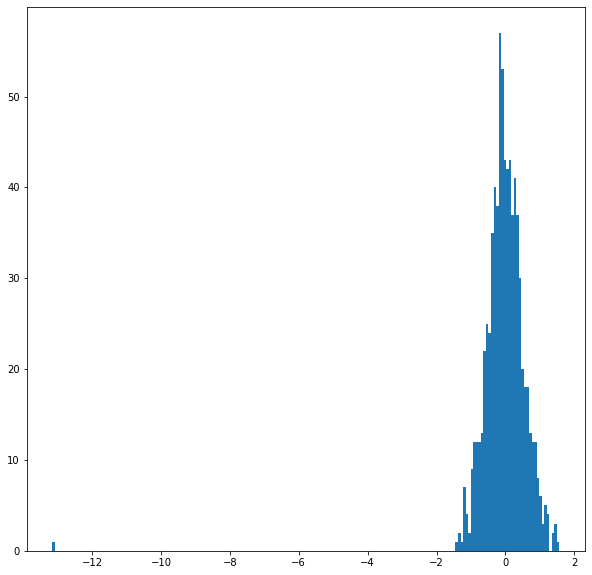

In [ ]:
#import da biblioteca gráfica
import matplotlib.pyplot as plt
%matplotlib inline

# For the 5th token in our sentence, select its feature values from layer 5.
token_i = 5
layer_i = 5
vec = hidden_states[layer_i][batch_i][token_i]

# Plot the values as a histogram to show their distribution.
plt.figure(figsize=(10,10))
plt.hist(vec, bins=200)
plt.show()

Grouping the values by layer makes sense for the model, but for our purposes we want it grouped by token. 

Current dimensions:

`[# layers, # batches, # tokens, # features]`

Desired dimensions:

`[# tokens, # layers, # features]`

Luckily, PyTorch includes the `permute` function for easily rearranging the dimensions of a tensor. 

However, the first dimension is currently a Python list! 

---------------

Agrupar os valores por camada faz sentido para o modelo, mas para nossos propósitos, queremos que ele seja agrupado por token.

Dimensões atuais:

`[# camadas, # lotes, # tokens, # recursos]`

`[# layers, # batches, # tokens, # features]`

Dimensões desejadas:

`[# tokens, # layers, # features]`

`[# tokens, # layers, # features]`

Felizmente, o PyTorch inclui a função `permute` para reorganizar facilmente as dimensões de um tensor.

No entanto, a primeira dimensão é atualmente uma lista Python!

No entanto, a primeira dimensão é atualmente uma já uma Tensor!

In [ ]:
# `hidden_states` is a Python list.
print('      Type of hidden_states: ', type(hidden_states))

# Each layer in the list is a torch tensor.
print('Tensor shape for each layer: ', hidden_states[0].size())

      Type of hidden_states:  <class 'tuple'>
Tensor shape for each layer:  torch.Size([1, 22, 768])


Let's combine the 12 layers to make this one whole big tensor.

---------------

Vamos combinar as 12 camadas para fazer todo esse grande tensor.

In [ ]:
# Concatenate the tensors for all layers. We use `stack` here to
# create a new dimension in the tensor.
token_embeddings = torch.stack(hidden_states, dim=0)

token_embeddings.size()

torch.Size([13, 1, 22, 768])

Let's get rid of the "batches" dimension since we don't need it.

------------------

Vamos nos livrar da dimensão "lotes", pois não precisamos dela(só temos um lote(batch).

In [ ]:
# Remove dimension 1, the "batches".
token_embeddings = torch.squeeze(token_embeddings, dim=1)

token_embeddings.size()

torch.Size([13, 22, 768])

Finally, we can switch around the "layers" and "tokens" dimensions with `permute`.

-------------------

Finalmente, podemos alternar as dimensões "layers" e "tokens" com `permute`.

In [ ]:
# Swap dimensions 0 and 1.
token_embeddings = token_embeddings.permute(1,0,2)

token_embeddings.size()

torch.Size([22, 13, 768])

## 3.3. Creating word and sentence vectors from hidden states

Now, what do we do with these hidden states? We would like to get individual vectors for each of our tokens, or perhaps a single vector representation of the whole sentence, but for each token of our input we have 12 separate vectors each of length 768.

In order to get the individual vectors we will need to combine some of the layer vectors...but which layer or combination of layers provides the best representation? The BERT authors tested this by feeding different vector combinations as input features to a BiLSTM used on a named entity recognition task and observing the resulting F1 scores.

(Image from [Jay Allamar](http://jalammar.github.io/illustrated-bert/)'s blog)

-----------------------

Agora, o que fazemos com esses estados ocultos? Gostaríamos de obter vetores individuais para cada um de nossos tokens, ou talvez uma única representação vetorial de toda a sentença, mas para cada token de nossa entrada, temos 12 vetores separados, cada um de comprimento 768.

Para obter os vetores individuais, precisamos combinar alguns dos vetores de camada ... mas qual camada ou combinação de camadas fornece a melhor representação? Os autores do BERT testaram isso alimentando diferentes combinações de vetores como recursos de entrada para um BiLSTM usado em uma tarefa de reconhecimento de entidade nomeada e observando as pontuações F1 resultantes.

(Imagem de [Jay Allamar](http://jalammar.github.io/illustrated-bert/)'s blog)

![alt text](http://jalammar.github.io/images/bert-feature-extraction-contextualized-embeddings.png)

While concatenation of the last four layers produced the best results on this specific task, many of the other methods come in a close second and in general it is advisable to test different versions for your specific application: results may vary.

This is partially demonstrated by noting that the different layers of BERT encode very different kinds of information, so the appropriate pooling strategy will change depending on the application because different layers encode different kinds of information. Hanxiao's discussion of this topic is relevant, as are their experiments looking at the PCA visualizations of different layers trained on a news dataset and observing the differences in the four class separations from different pooling strategies:

(Images from [Hanxiao's](https://github.com/hanxiao/bert-as-service) BERT-as-a-service)

---------------------------

Embora a concatenação das últimas quatro camadas tenha produzido os melhores resultados nessa tarefa específica, muitos dos outros métodos ocorrem em um segundo próximo e, em geral, é aconselhável testar versões diferentes para sua aplicação específica: os resultados podem variar.

Isso é parcialmente demonstrado ao observar que as diferentes camadas do BERT codificam tipos muito diferentes de informações, portanto, a estratégia de pool apropriada será alterada dependendo do aplicativo, porque diferentes camadas codificam diferentes tipos de informações. A discussão de Hanxiao sobre esse tópico é relevante, assim como seus experimentos analisando as visualizações de diferentes camadas do PCA treinadas em um conjunto de dados de notícias e observando as diferenças nas quatro separações de classe das diferentes estratégias de agrupamento:

(Imagens de [Hanxiao's](https://github.com/hanxiao/bert-as-service) BERT-as-a-service)

![alt text](https://raw.githubusercontent.com/hanxiao/bert-as-service/master/.github/pool_mean.png)
![alt text](https://raw.githubusercontent.com/hanxiao/bert-as-service/master/.github/pool_max.png)

The upshot being that, again**, the correct pooling strategy (mean, max, concatenation, etc.) and layers used (last four, all, last layer, etc.) is dependent on the application**. This discussion of pooling strategies applies both to entire sentence embeddings and individual ELMO-like token embeddings.

--------------------------

O resultado é que, novamente **, a estratégia de pool correta (média, max, concatenação etc.) e as camadas usadas (quatro últimas, todas, última camada etc.) dependem do aplicativo**. Essa discussão sobre estratégias de agrupamento se aplica tanto a inserções inteiras de frases quanto a inserções individuais de tokens semelhantes a ELMO.






### Word Vectors

To give you some examples, let's create word vectors two ways. 

First, let's **concatenate** the last four layers, giving us a single word vector per token. Each vector will have length `4 x 768 = 3,072`. 

------------------

Para dar alguns exemplos, vamos criar vetores de palavras de duas maneiras.

Primeiro, vamos concatenar as últimas quatro camadas, fornecendo um vetor de palavra única por token. Cada vetor terá o comprimento `4 x 768 = 3.072`.


In [ ]:
# Stores the token vectors, with shape [22 x 3,072]
token_vecs_cat = []

# `token_embeddings` is a [22 x 12 x 768] tensor.

# For each token in the sentence...
for token in token_embeddings:
    
    # `token` is a [12 x 768] tensor

    # Concatenate the vectors (that is, append them together) from the last 
    # four layers.
    # Each layer vector is 768 values, so `cat_vec` is length 3,072.
    cat_vec = torch.cat((token[-1], token[-2], token[-3], token[-4]), dim=0)
    
    # Use `cat_vec` to represent `token`.
    token_vecs_cat.append(cat_vec)

print ('Shape is: %d x %d' % (len(token_vecs_cat), len(token_vecs_cat[0])))

Shape is: 22 x 3072


As an alternative method, let's try creating the word vectors by **summing** together the last four layers.

-----------------

Como método alternativo, vamos tentar criar os vetores de palavras **somado** juntas as últimas quatro camadas.

In [ ]:
# Stores the token vectors, with shape [25 x 768]
token_vecs_sum = []

# `token_embeddings` is a [22 x 12 x 768] tensor.

# For each token in the sentence...
for token in token_embeddings:

    # `token` is a [12 x 768] tensor

    # Sum the vectors from the last four layers.
    sum_vec = torch.sum(token[-4:], dim=0)
    
    # Use `sum_vec` to represent `token`.
    token_vecs_sum.append(sum_vec)

print ('Shape is: %d x %d' % (len(token_vecs_sum), len(token_vecs_sum[0])))

Shape is: 22 x 768


### Sentence Vectors

To get a single vector for our entire sentence we have multiple application-dependent strategies, but a simple approach is to average the second to last hiden layer of each token producing a single 768 length vector.

-----------------------

Para obter um único vetor para toda a sentença, temos várias estratégias dependentes de aplicativos, mas uma abordagem simples é calcular a penúltima camada hiden de cada token, produzindo um único vetor de 768 comprimentos.

In [ ]:
# `hidden_states` has shape [13 x 1 x 22 x 768]

# `token_vecs` is a tensor with shape [22 x 768]
token_vecs = hidden_states[-2][0]

# Calculate the average of all 22 token vectors.
sentence_embedding = torch.mean(token_vecs, dim=0)

In [ ]:
print ("Our final sentence embedding vector of shape:", sentence_embedding.size())

Our final sentence embedding vector of shape: torch.Size([768])


## 3.4. Confirming contextually dependent vectors

To confirm that the value of these vectors are in fact contextually dependent, let's look at the different instances of the word "bank" in our example sentence:

"After stealing money from the **bank vault**, the **bank robber** was seen fishing on the Mississippi **river bank**."

Let's find the index of those three instances of the word "bank" in the example sentence.

-----------------------

Para confirmar que o valor desses vetores são de fato dependentes do contexto, vejamos as diferentes instâncias da palavra "banco" em nossa frase de exemplo:

"Depois de roubar **dinheiro do banco**, o **assantante de banco** foi visto pescando no **banco do rio** Mississippi.

Vamos encontrar o índice dessas três instâncias da palavra "banco" na sentença de exemplo.

In [ ]:
for i, token_str in enumerate(tokenized_text):
  print (i, token_str)

0 [CLS]
1 after
2 stealing
3 money
4 from
5 the
6 bank
7 vault
8 ,
9 the
10 bank
11 robber
12 was
13 seen
14 fishing
15 on
16 the
17 mississippi
18 river
19 bank
20 .
21 [SEP]


**Using summing**

They are at 6, 10, and 19.

For this analysis, we'll use the word vectors that we created by summing the last four layers.

We can try printing out their vectors to compare them.

----------------
**Usando a soma**

Eles estão em 6, 10 e 19.

Para esta análise, usaremos os vetores de palavras da última camada.

Podemos tentar imprimir seus vetores para compará-los.

base(comunidade):
* bank vault    tensor([ 0.9001, -0.5380, -0.1669,  0.2242,  0.6897])
* bank robber   tensor([ 0.7977, -0.5217, -0.1984,  0.1890,  0.5941])
* river bank    tensor([ 0.2961, -0.2856, -0.0382,  0.1674,  0.7713])

large(comunidade):
* bank vault    tensor([-0.5038, -0.3816,  0.1298, -0.0073, -0.5254])
* bank robber   tensor([-0.8055, -0.5161, -0.0176, -0.0086, -0.8002])
* river bank    tensor([-0.5745,  0.0721, -0.0611,  0.0424, -0.2840])

In [ ]:
print('First 5 vector values for each instance of "bank".')
print('')
print("bank vault   ", str(token_vecs_sum[6][:5]))
print("bank robber  ", str(token_vecs_sum[10][:5]))
print("river bank   ", str(token_vecs_sum[19][:5]))

First 5 vector values for each instance of "bank".

bank vault    tensor([ 3.3596, -2.9805, -1.5421,  0.7065,  2.0031])
bank robber   tensor([ 2.7359, -2.5577, -1.3094,  0.6797,  1.6633])
river bank    tensor([ 1.5266, -0.8895, -0.5152, -0.9298,  2.8334])


We can see that the values differ, but let's calculate the cosine similarity between the vectors to make a more precise comparison.

-------------------

Podemos ver que os valores diferem, mas vamos calcular a semelhança de cosseno entre os vetores para fazer uma comparação mais precisa.

base:
* Vector similarity for  *similar*  meanings:  0.94
* Vector similarity for *different* meanings:  0.69

large:
* Vector similarity for  *similar*  meanings:  0.94
* Vector similarity for *different* meanings:  0.59

In [ ]:
from scipy.spatial.distance import cosine

# Calculate the cosine similarity between the word bank 
# in "bank robber" vs "river bank" (different meanings).
diff_bank = 1 - cosine(token_vecs_sum[10], token_vecs_sum[19])

# Calculate the cosine similarity between the word bank
# in "bank robber" vs "bank vault" (same meaning).
same_bank = 1 - cosine(token_vecs_sum[10], token_vecs_sum[6])

print('Vector similarity for  *similar*  meanings:  %.2f' % same_bank)
print('Vector similarity for *different* meanings:  %.2f' % diff_bank)

Vector similarity for  *similar*  meanings:  0.94
Vector similarity for *different* meanings:  0.69


**Using concat**

---------

**Usando concat**

In [ ]:
print('First 5 vector values for each instance of "bank".')
print('')
print("bank vault   ", str(token_vecs_cat[6][:5]))
print("bank robber  ", str(token_vecs_cat[10][:5]))
print("river bank   ", str(token_vecs_cat[19][:5]))

First 5 vector values for each instance of "bank".

bank vault    tensor([ 0.9001, -0.5380, -0.1669,  0.2242,  0.6897])
bank robber   tensor([ 0.7977, -0.5217, -0.1984,  0.1890,  0.5941])
river bank    tensor([ 0.2961, -0.2856, -0.0382,  0.1674,  0.7713])


We can see that the values differ, but let's calculate the cosine similarity between the vectors to make a more precise comparison.

-------------------

Podemos ver que os valores diferem, mas vamos calcular a semelhança de cosseno entre os vetores para fazer uma comparação mais precisa.

base:
* Vector similarity for  *similar*  meanings:  0.94
* Vector similarity for *different* meanings:  0.69

large:
* Vector similarity for  *similar*  meanings:  0.94
* Vector similarity for *different* meanings:  0.59

In [ ]:
from scipy.spatial.distance import cosine

# Calculate the cosine similarity between the word bank 
# in "bank robber" vs "river bank" (different meanings).
diff_bank = 1 - cosine(token_vecs_cat[10], token_vecs_cat[19])

# Calculate the cosine similarity between the word bank
# in "bank robber" vs "bank vault" (same meaning).
same_bank = 1 - cosine(token_vecs_cat[10], token_vecs_cat[6])

print('Vector similarity for  *similar*  meanings:  %.2f' % same_bank)
print('Vector similarity for *different* meanings:  %.2f' % diff_bank)

Vector similarity for  *similar*  meanings:  0.94
Vector similarity for *different* meanings:  0.69


This looks pretty good!

--------------------

Isso parece muito bom!

## 3.5 Visualizando Frases
Here, we want to show the connection between the tokens of a sentence using the BERT embedding. We plot the tokens' embeddings in a subspace, where (0,1) and (1,0) are the [CLS] and [SEP] starter and ending tokens of the sentence.

----------------

Aqui, queremos mostrar a conexão entre os tokens de uma frase usando a incorporação do BERT. Plotamos as inserções dos tokens em um subespaço, onde (0,1) e (1,0) são os marcadores de partida [CLS] e [SEP] e marcadores finais e finais da frase.

Notebook original:
https://colab.research.google.com/drive/1TCgnpIwsr6uK4cP0Gk1RCCQrFy6s3Xc1

In [ ]:
#bibliotecas
import numpy as np
import torch

import matplotlib.pyplot as plt
%matplotlib inline

Texto a ser plotado no gráfico.

In [ ]:
text = "The sky is blue today."

Adiciona os tokens especiais ao texto.

In [ ]:
# Add the special tokens.
marked_text = "[CLS] " + text + " [SEP]"

After adding the special tokens we need to split the text into tokens, we need to convert the text from a list of strings to a list of vocabulary indices.

---------------

Depois de adicionar os tokens especais precisamos dividir o texto em tokens, precisamos converter o texto de uma lista de strings para uma lista de indeces de vocabulário.

In [ ]:
# Split the sentence into tokens.
tokenized_text = tokenizer.tokenize(marked_text)

# Map the token strings to their vocabulary indeces.
indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)

# Print the original sentence.
print('Text: ', text)

# Display the words with their indexes.
for tup in zip(tokenized_text, indexed_tokens):
    print('{:<12} {:>6,}'.format(tup[0], tup[1]))

Text:  The sky is blue today.
[CLS]           101
the           1,996
sky           3,712
is            2,003
blue          2,630
today         2,651
.             1,012
[SEP]           102


O BERT é treinado e espera pares de frases, usando 1s e 0s para distinguir entre as duas frases. Ou seja, para cada token em "tokenized_text", devemos especificar a qual frase pertence: sentença 0 (uma série de 0s) ou sentença 1 (uma série de 1s). Para nossos propósitos, as entradas de sentença única requerem apenas uma série de 1s; portanto, criaremos um vetor de 1s para cada token em nossa frase de entrada.

Se você deseja processar duas frases, atribua cada palavra na primeira frase mais o token '[SEP]' a 0 e todos os tokens da segunda frase a 1.

In [ ]:
# Mark each of tokens as belonging to sentence "1".
segments_ids = [1] * len(tokenized_text)

print (segments_ids)

[1, 1, 1, 1, 1, 1, 1, 1]


Em seguida, precisamos converter nossos dados em tensores de tocha e chamar o modelo BERT. A interface BERT PyTorch exige que os dados estejam em tensores de tocha em vez de em listas Python; portanto, convertemos as listas aqui - isso não altera a forma ou os dados.


In [ ]:
# Convert inputs to PyTorch tensors
tokens_tensor = torch.tensor([indexed_tokens])
segments_tensors = torch.tensor([segments_ids])

A função `model()` executa o texto através do BERT. Os resultados do processamento serão retornados para `outputs` ou `last_hidden_states`.

In [ ]:
# Run the text through BERT, and collect all of the hidden states produced
# from all 12 layers. 
with torch.no_grad():

    outputs = model(tokens_tensor, segments_tensors)

    # Evaluating the model will return a different number of objects based on 
    # how it's  configured in the `from_pretrained` call earlier. In this case, 
    # becase we set `output_hidden_states = True`, the third item will be the 
    # hidden states from all layers. See the documentation for more details:
    # https://huggingface.co/transformers/model_doc/bert.html#bertmodel

    # Retorno de model quando ´last_hidden_state=True´ é setado:    
    # outputs[0] = last_hidden_state, outputs[1] = pooler_output, outputs[2] = hidden_states

    #output = last_hidden_states
    hidden_states = outputs[0]     

Somente a última camada é armazenada. O conjunto completo saída para este modelo, armazenados no objeto `outputs`, é um pouco grande. Este objeto tem três dimensões, na seguinte ordem: 

* O número do lote (1 frase)
* O número de tokens (8 tokens)
* O número da unidade / recurso oculto (768 recursos)

A primeira dimensão, o tamanho do lote(batch size = 1), é usada ao enviar várias frases para o modelo de uma só vez; aqui, porém, temos apenas um exemplo de sentença.



In [ ]:
print ("Number of batches:", len(hidden_states))
batch_i = 0

print ("Number of tokens:", len(hidden_states[batch_i]))
token_i = 0

print ("Number of hidden units:", len(hidden_states[batch_i][token_i]))

Number of batches: 1
Number of tokens: 8
Number of hidden units: 768


Let's get rid of the "batches" dimension since we don't need it.

Vamos nos livrar da dimensão "batches", pois não precisamos dela. Só temos uma frase.

In [ ]:
# Remove dimension 1, the "batches".
token_embeddings = torch.squeeze(hidden_states, dim=0)

token_embeddings.size()

torch.Size([8, 768])

Transforma  o vetor de embendings em um array.

In [ ]:
#retrive as array of embeddings tokens
embeddings = token_embeddings.numpy()


Base selecionada para que o [CLS] e o [SEP] passem para (0,1) e (1,0)

In [ ]:
#Convert para um array a última
W = np.array(embeddings)
#Transforma em um array
B = np.array([embeddings[0], embeddings[-1]])
#Invert B.T
Bi = np.linalg.pinv(B.T)

print(W.shape)
print(Bi.shape)

(8, 768)
(2, 768)


Project the word tokens to the subspace

--------------

Projeta os tokens das palavras no subspaço

In [ ]:
Wp = np.matmul(Bi,W.T)

print(Wp.shape)

(2, 8)


Plota o gráfico da frase

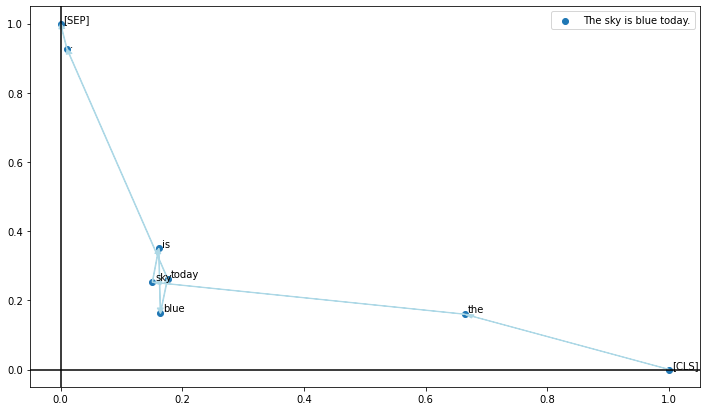

In [ ]:
plt.figure(figsize=(12,7))
plt.axhline(color='black')
plt.axvline(color='black')
plt.scatter(Wp[0,:], Wp[1,:], label=text)
rX = max(Wp[0,:])-min(Wp[0,:])
rY = max(Wp[1,:])-min(Wp[1,:])
rM = max(rX, rY)
eps = 0.005
for i, txt in enumerate(tokenized_text):
    plt.annotate(txt, (Wp[0,i]+rX*eps, Wp[1,i]+rX*eps))
    if i>0:
        plt.arrow(Wp[0,i-1],Wp[1,i-1], Wp[0,i]-Wp[0,i-1], Wp[1,i]-Wp[1,i-1], color='lightblue', head_length=rM*eps*3, head_width=rM*eps*2, length_includes_head=True)
plt.legend()
plt.show()

Let's create a function with the previous steps to generate the plot-able coordinates from the sentences!

-------------

Let's create a function with the previous steps to generate the plot-able coordinates from the sentences!

In [ ]:
def get_visual_embs(text, modelbert):
    
    # Add the special tokens.
    marked_text = "[CLS] " + text + " [SEP]"

    # Split the sentence into tokens.
    tokenized_text = tokenizer.tokenize(marked_text)

    # Map the token strings to their vocabulary indeces.
    indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
    
    # Mark each of tokens as belonging to sentence "1".
    segments_ids = [1] * len(tokenized_text)

    # Convert inputs to PyTorch tensors
    tokens_tensor = torch.tensor([indexed_tokens])
    segments_tensors = torch.tensor([segments_ids])

    # Predict hidden states features for each layer
    with torch.no_grad():
        
        # A avaliação do modelo retorna um número de diferentes objetos com base em
        # como é configurado na chamada do método `from_pretrained` anterior. Nesse caso,
        # porque definimos `output_hidden_states = True`, o terceiro item será o
        # estados ocultos(hidden_states) de todas as camadas. Veja a documentação para mais detalhes:
        # https://huggingface.co/transformers/model_doc/bert.html#bertmodel

        # Retorno de model quando ´last_hidden_state=True´ é setado:    
        # outputs[0] = last_hidden_state, outputs[1] = pooler_output, outputs[2] = hidden_states

        outputs = modelbert(tokens_tensor, segments_tensors)

        # última camada embedding
        hidden_states = outputs[0]    

    # Remove dimension 1, the "batches".
    token_embeddings = torch.squeeze(hidden_states, dim=0)

    # retrive as array of embeddings tokens
    embeddings = token_embeddings.numpy()

    # Convert para um array
    W = np.array(embeddings)
    # Transforma em um array
    B = np.array([embeddings[0], embeddings[-1]])
    # Invert B.T
    Bi = np.linalg.pinv(B.T)

    # Project the word tokens to the subspace
    Wp = np.matmul(Bi,W.T)

    return Wp, tokenized_text

### Sentence comparison

Okay, let's investigate on different sentences!

------------------------

Ok, vamos investigar em frases diferentes!

Let's change one word in the sentence!

['[CLS]', 'the', 'sky', 'is', 'blue', 'today', '.', '[SEP]']
['[CLS]', 'the', 'sea', 'is', 'blue', 'today', '.', '[SEP]']


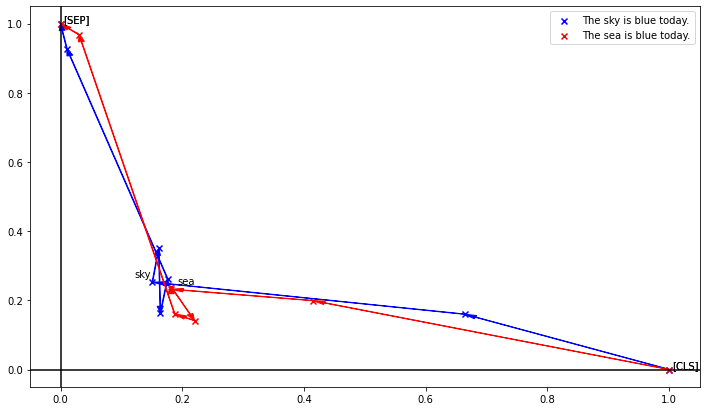

In [ ]:
sentences = ['The sky is blue today.', 'The sea is blue today.']
colors = ['blue', 'red']

plt.figure(figsize=(12,7))
plt.axhline(color='black')
plt.axvline(color='black')
for n,s in enumerate(sentences):
    Wp, tokens = get_visual_embs(s, model)
    print(tokens)
    plt.scatter(Wp[0,:], Wp[1,:], color=colors[n], marker='x', label=s)
    rX = max(Wp[0,:])-min(Wp[0,:])
    rY = max(Wp[1,:])-min(Wp[1,:])
    rM = max(rX, rY)
    eps = 0.005
    eps2 = 0.005
    for i, txt in enumerate(tokens):
        if txt in ['[CLS]', '[SEP]']:
            plt.annotate(txt, (Wp[0,i]+rX*eps, Wp[1,i]+rX*eps))
        if txt == 'sky':
            plt.annotate(txt, (Wp[0,i]+rX*eps*-6, Wp[1,i]+rX*eps*3))
        if txt == 'sea':
            plt.annotate(txt, (Wp[0,i]+rX*eps*2, Wp[1,i]+rX*eps*3))
        if i>0:
            plt.arrow(Wp[0,i-1],Wp[1,i-1], Wp[0,i]-Wp[0,i-1], Wp[1,i]-Wp[1,i-1], color=colors[n], head_length=rM*eps2*4, head_width=rM*eps2*2, length_includes_head=True)
plt.legend()
plt.show()

Now, let's change the tense of the sentence!

['[CLS]', 'this', 'is', 'a', 'horrible', 'idea', '!', '[SEP]']
['[CLS]', 'this', 'was', 'a', 'horrible', 'idea', '!', '[SEP]']
['[CLS]', 'this', 'will', 'be', 'a', 'horrible', 'idea', '!', '[SEP]']


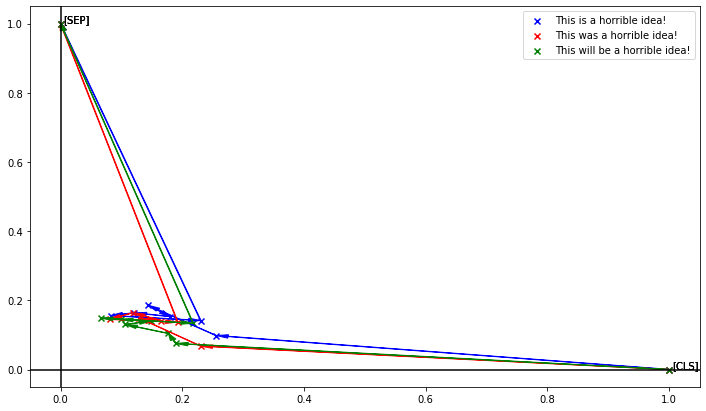

In [ ]:
sentences = ['This is a horrible idea!', 'This was a horrible idea!', 'This will be a horrible idea!']
colors = ['blue', 'red', 'green']

plt.figure(figsize=(12,7))
plt.axhline(color='black')
plt.axvline(color='black')
for n,s in enumerate(sentences):
    Wp, tokens = get_visual_embs(s, model)
    print(tokens)
    plt.scatter(Wp[0,:], Wp[1,:], color=colors[n], marker='x', label=s)
    rX = max(Wp[0,:])-min(Wp[0,:])
    rY = max(Wp[1,:])-min(Wp[1,:])
    rM = max(rX, rY)
    eps = 0.005
    eps2 = 0.005
    for i, txt in enumerate(tokens):
        if txt in ['[CLS]', '[SEP]']:
            plt.annotate(txt, (Wp[0,i]+rX*eps, Wp[1,i]+rX*eps))
        #plt.annotate(txt, (Wp[0,i]+rX*eps, Wp[1,i]+rX*eps))
        if i>0:
            plt.arrow(Wp[0,i-1],Wp[1,i-1], Wp[0,i]-Wp[0,i-1], Wp[1,i]-Wp[1,i-1], color=colors[n], head_length=rM*eps2*4, head_width=rM*eps2*2, length_includes_head=True)
plt.legend()
plt.show()

Punctuation characters?

['[CLS]', 'this', 'is', 'a', 'horrible', 'idea', '.', '[SEP]']
['[CLS]', 'this', 'is', 'a', 'horrible', 'idea', '!', '[SEP]']
['[CLS]', 'this', 'is', 'a', 'horrible', 'idea', '?', '[SEP]']


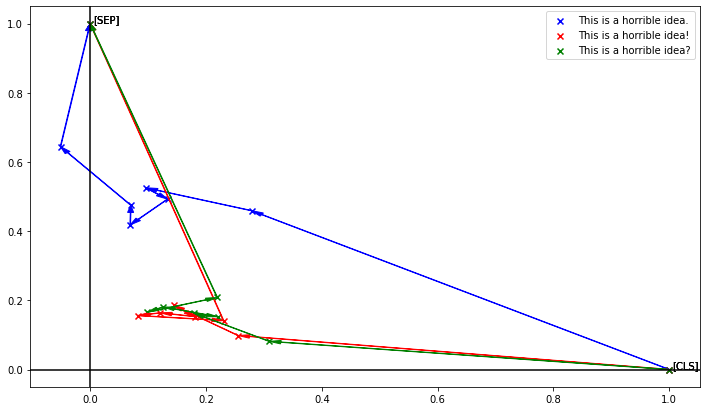

In [ ]:
sentences = ['This is a horrible idea.', 'This is a horrible idea!', 'This is a horrible idea?']
colors = ['blue', 'red', 'green', 'yellow']

plt.figure(figsize=(12,7))
plt.axhline(color='black')
plt.axvline(color='black')
for n,s in enumerate(sentences):
    Wp, tokens = get_visual_embs(s, model)
    print(tokens)
    plt.scatter(Wp[0,:], Wp[1,:], color=colors[n], marker='x', label=s)
    rX = max(Wp[0,:])-min(Wp[0,:])
    rY = max(Wp[1,:])-min(Wp[1,:])
    rM = max(rX, rY)
    eps = 0.005
    eps2 = 0.005
    for i, txt in enumerate(tokens):
        if txt in ['[CLS]', '[SEP]']:
            plt.annotate(txt, (Wp[0,i]+rX*eps, Wp[1,i]+rX*eps))
        #plt.annotate(txt, (Wp[0,i]+rX*eps, Wp[1,i]+rX*eps))
        if i>0:
            plt.arrow(Wp[0,i-1],Wp[1,i-1], Wp[0,i]-Wp[0,i-1], Wp[1,i]-Wp[1,i-1], color=colors[n], head_length=rM*eps2*4, head_width=rM*eps2*2, length_includes_head=True)
plt.legend()
plt.show()

Complex sentences with Mexico in it.

['[CLS]', 'in', 'mexico', 'the', 'national', 'government', 'is', 'carrying', 'out', 'a', 'consistent', 'policy', 'of', 'developing', 'its', 'railway', 'lines', '.', '[SEP]']
['[CLS]', 'bo', '##rl', '##au', '##g', 'also', 'promoted', 'the', 'process', '(', 'which', 'proved', 'wildly', 'successful', ')', 'of', 'having', 'two', 'wheat', '-', 'growing', 'seasons', 'in', 'mexico', ',', 'one', 'in', 'the', 'highlands', ',', 'then', 'another', 'in', 'the', 'valley', 'regions', '.', '[SEP]']
['[CLS]', 'that', "'", 's', 'in', 'mexico', ',', 'too', '.', '[SEP]']
['[CLS]', 'in', '1904', 'he', 'went', 'to', 'japan', 'as', 'war', 'correspondent', 'and', 'in', '1914', 'to', 'mexico', 'in', 'the', 'same', 'capacity', '.', '[SEP]']


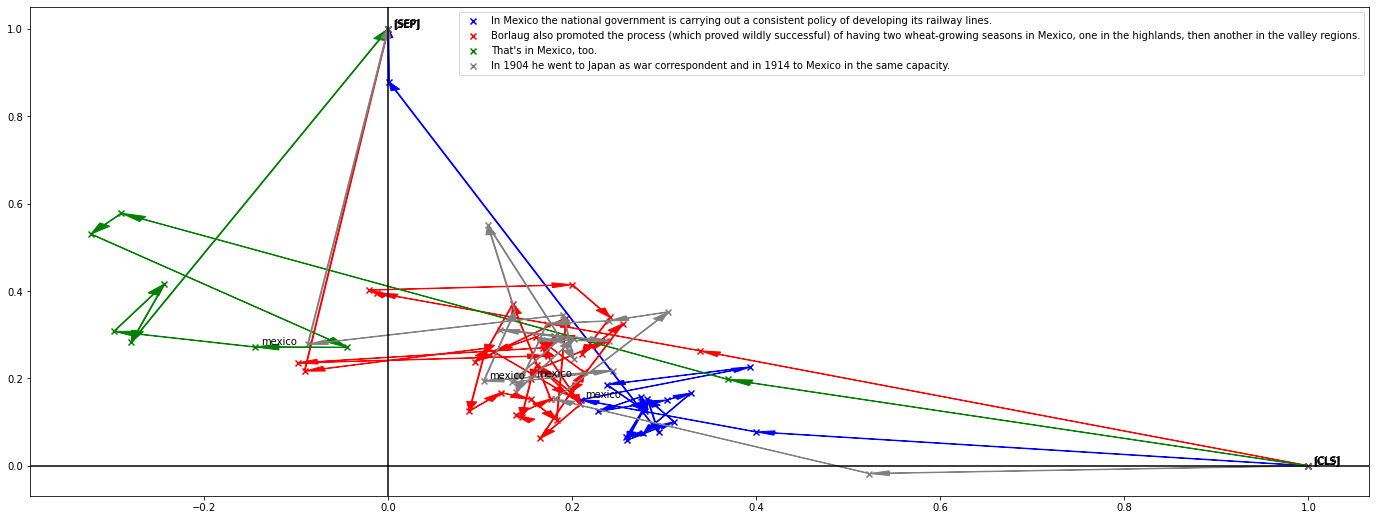

In [ ]:
# Some sentences from here: https://sentence.yourdictionary.com/mexico
sentences = ["In Mexico the national government is carrying out a consistent policy of developing its railway lines.", 
             "Borlaug also promoted the process (which proved wildly successful) of having two wheat-growing seasons in Mexico, one in the highlands, then another in the valley regions.",
             "That's in Mexico, too.",
             "In 1904 he went to Japan as war correspondent and in 1914 to Mexico in the same capacity."]
colors = ['blue', 'red', 'green', 'grey', 'purple', 'orange', 'lightblue', 'yellow']

plt.figure(figsize=(24,9))
plt.axhline(color='black')
plt.axvline(color='black')
for n,s in enumerate(sentences):
    Wp, tokens = get_visual_embs(s, model)
    print(tokens)
    plt.scatter(Wp[0,:], Wp[1,:], color=colors[n], marker='x', label=s)
    rX = max(Wp[0,:])-min(Wp[0,:])
    rY = max(Wp[1,:])-min(Wp[1,:])
    rM = max(rX, rY)
    eps = 0.005
    eps2 = 0.005
    for i, txt in enumerate(tokens):
        if txt in ['[CLS]', '[SEP]']:
            plt.annotate(txt, (Wp[0,i]+rX*eps, Wp[1,i]+rX*eps))
        if txt=='mexico':
            plt.annotate(txt, (Wp[0,i]+rX*eps, Wp[1,i]+rX*eps))
        if i>0:
            plt.arrow(Wp[0,i-1],Wp[1,i-1], Wp[0,i]-Wp[0,i-1], Wp[1,i]-Wp[1,i-1], color=colors[n], head_length=rM*eps2*4, head_width=rM*eps2*2, length_includes_head=True)
plt.legend()
plt.show()

Reactions, dialogue

['[CLS]', 'yes', ',', 'that', "'", 's', 'true', '!', '[SEP]']
['[CLS]', 'of', 'course', ',', 'he', 'is', 'successful', '.', '[SEP]']
['[CLS]', 'no', ',', 'did', 'you', '?', '[SEP]']
['[CLS]', 'i', 'can', 'totally', 'agree', 'with', 'that', '.', '[SEP]']
['[CLS]', 'however', ',', 'it', 'can', "'", 't', 'be', 'seen', '.', '[SEP]']


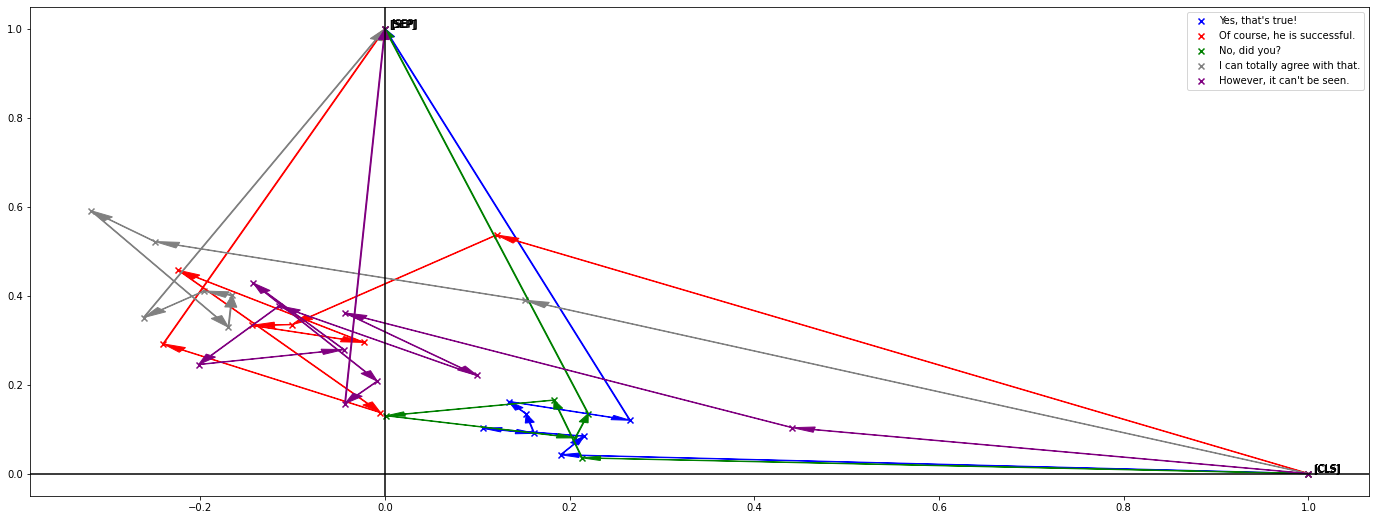

In [ ]:
# Some sentences from here: https://sentence.yourdictionary.com/mexico
sentences = ["Yes, that's true!", 
             "Of course, he is successful.",
             "No, did you?",
             "I can totally agree with that.",
             "However, it can't be seen.",]
colors = ['blue', 'red', 'green', 'grey', 'purple', 'orange', 'lightblue', 'yellow']

plt.figure(figsize=(24,9))
plt.axhline(color='black')
plt.axvline(color='black')
for n,s in enumerate(sentences):
    Wp, tokens = get_visual_embs(s, model)
    print(tokens)
    plt.scatter(Wp[0,:], Wp[1,:], color=colors[n], marker='x', label=s)
    rX = max(Wp[0,:])-min(Wp[0,:])
    rY = max(Wp[1,:])-min(Wp[1,:])
    rM = max(rX, rY)
    eps = 0.005
    eps2 = 0.005
    for i, txt in enumerate(tokens):
        if txt in ['[CLS]', '[SEP]']:
            plt.annotate(txt, (Wp[0,i]+rX*eps, Wp[1,i]+rX*eps))
        if i>0:
            plt.arrow(Wp[0,i-1],Wp[1,i-1], Wp[0,i]-Wp[0,i-1], Wp[1,i]-Wp[1,i-1], color=colors[n], head_length=rM*eps2*4, head_width=rM*eps2*2, length_includes_head=True)
plt.legend()
plt.show()

Non-real sentences

['[CLS]', 'the', 'the', 'the', 'the', 'the', 'the', 'the', 'the', 'the', '[SEP]']
['[CLS]', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '[SEP]']
['[CLS]', 'gr', '##e', 'h', '##tr', '##ha', 'h', '##tha', '##te', '##h', 'het', '##a', 'ge', '##r', 'er', '[SEP]']
['[CLS]', 'the', 'sky', 'is', 'blue', 'today', '.', '[SEP]']
['[CLS]', 'james', 'cook', 'was', 'a', 'very', 'good', 'man', 'and', 'a', 'loving', 'husband', '.', '[SEP]']


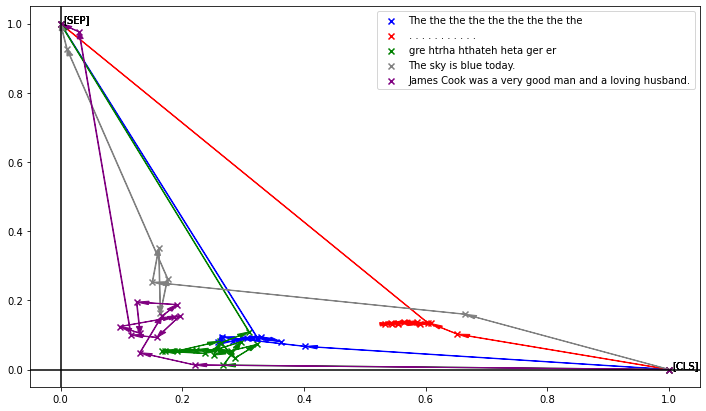

In [ ]:
# Some sentences from here: https://sentence.yourdictionary.com/mexico
sentences = ["The the the the the the the the the", 
             ". . . . . . . . . . .",
             "gre htrha hthateh heta ger er",
             "The sky is blue today.",
             "James Cook was a very good man and a loving husband."]
colors = ['blue', 'red', 'green', 'grey', 'purple', 'orange', 'lightblue', 'yellow']

plt.figure(figsize=(12,7))
plt.axhline(color='black')
plt.axvline(color='black')
for n,s in enumerate(sentences):
    Wp, tokens = get_visual_embs(s, model)
    print(tokens)
    plt.scatter(Wp[0,:], Wp[1,:], color=colors[n], marker='x', label=s)
    rX = max(Wp[0,:])-min(Wp[0,:])
    rY = max(Wp[1,:])-min(Wp[1,:])
    rM = max(rX, rY)
    eps = 0.005
    eps2 = 0.005
    for i, txt in enumerate(tokens):
        if txt in ['[CLS]', '[SEP]']:
            plt.annotate(txt, (Wp[0,i]+rX*eps, Wp[1,i]+rX*eps))
        if i>0:
            plt.arrow(Wp[0,i-1],Wp[1,i-1], Wp[0,i]-Wp[0,i-1], Wp[1,i]-Wp[1,i-1], color=colors[n], head_length=rM*eps2*4, head_width=rM*eps2*2, length_includes_head=True)
plt.legend()
plt.show()

## 4.4. Implementations

You can use the code in this notebook as the foundation of your own application to extract BERT features from text. However, official [tensorflow](https://github.com/google-research/bert/blob/master/extract_features.py) and well-regarded [pytorch](https://github.com/huggingface/pytorch-pretrained-BERT/blob/master/examples/extract_features.py) implementations already exist that do this for you.  Additionally, [bert-as-a-service](https://github.com/hanxiao/bert-as-service) is an excellent tool designed specifically for running this task with high performance, and is the one I would recommend for production applications. The author has taken great care in the tool's implementation and provides excellent documentation (some of which was used to help create this tutorial) to help users understand the more nuanced details the user faces, like resource management and pooling strategy.

---------------

Você pode usar o código neste notebook como base do seu próprio aplicativo para extrair recursos do BERT do texto. No entanto, [tensorflow]oficial (https://github.com/google-research/bert/blob/master/extract_features.py) e bem conceituado [pytorch](https://github.com/huggingface/pytorch-pretrained -BERT / blob / master / examples / extract_features.py) já existem implementações que fazem isso por você. Além disso, o [bert-as-a-service](https://github.com/hanxiao/bert-as-service) é uma excelente ferramenta projetada especificamente para executar esta tarefa com alto desempenho e é a que eu recomendaria para aplicações de produção. O autor tomou muito cuidado na implementação da ferramenta e fornece excelente documentação (algumas das quais foram usadas para ajudar a criar este tutorial) para ajudar os usuários a entender os detalhes mais sutis que o usuário enfrenta, como gerenciamento de recursos e estratégia de pool.

# 4. Appendix


## 4.1. Special tokens

It should be noted that although the `[CLS]` acts as an "aggregate representation" for classification tasks, this is not the best choice for a high quality sentence embedding vector. [According to](https://github.com/google-research/bert/issues/164) BERT author Jacob Devlin: "*I'm not sure what these vectors are, since BERT does not generate meaningful sentence vectors. It seems that this is is doing average pooling over the word tokens to get a sentence vector, but we never suggested that this will generate meaningful sentence representations*."

(However, the [CLS] token does become meaningful if the model has been fine-tuned, where the last hidden layer of this token is used as the "sentence vector" for sequence classification.)

-------------------

Deve-se notar que, embora o `[CLS]` atue como uma "representação agregada" para tarefas de classificação, essa não é a melhor opção para um vetor de incorporação de sentenças de alta qualidade. [Segundo](https://github.com/google-research/bert/issues/164) o autor do BERT, Jacob Devlin: "*Não tenho certeza do que são esses vetores, pois o BERT não gera vetores de frases significativos. Parece que isso está fazendo um pool médio dos tokens de palavras para obter um vetor de sentença, mas nunca sugerimos que isso gere representações significativas de sentenças*."

(No entanto, o token [CLS] se torna significativo se o modelo tiver sido ajustado, onde a última camada oculta desse token é usada como o "vetor de sentença" para classificação de sequência.)



## 4.2. Out of vocabulary words

For **out of vocabulary words** that are composed of multiple sentence and character-level embeddings, there is a further issue of how best to recover this embedding. Averaging the embeddings is the most straightforward solution (one that is relied upon in similar embedding models with subword vocabularies like fasttext), but summation of subword embeddings and simply taking the last token embedding (remember that the vectors are context sensitive) are acceptable alternative strategies.

-----------------

Para **palavras fora do vocabulário** compostas de várias frases e incorporação no nível do caractere, há uma questão adicional sobre a melhor forma de recuperar essa incorporação. A média da incorporação é a solução mais direta (que se baseia em modelos de incorporação semelhantes com vocabulários de subpalavras como fasttext), mas a soma dos incorporamentos de subpalavras e a simples incorporação do último token (lembre-se de que os vetores são sensíveis ao contexto) são estratégias alternativas aceitáveis .



## 4.3. Similarity metrics

It is worth noting that word-level **similarity comparisons** are not appropriate with BERT embeddings because these embeddings are contextually dependent, meaning that the word vector changes depending on the sentence it appears in. This allows wonderful things like polysemy so that e.g. your representation encodes river "bank" and not a financial institution "bank",  but makes direct word-to-word similarity comparisons less valuable. However, for sentence embeddings similarity comparison is still valid such that one can query, for example, a single sentence against a dataset of other sentences in order to find the most similar. Depending on the similarity metric used, the resulting similarity values will be less informative than the relative ranking of similarity outputs since many similarity metrics make assumptions about the vector space (equally-weighted dimensions, for example) that do not hold for our 768-dimensional vector space.

-------------

Vale a pena notar que as comparações de similaridade no nível da palavra ** não são apropriadas para os agrupamentos BERT, porque esses agrupamentos são contextualmente dependentes, o que significa que o vetor de palavras muda dependendo da frase em que aparece. Isso permite coisas maravilhosas, como a polissemia, para que, por exemplo, sua representação codifica "banco" de rio e não "banco" de instituição financeira, mas torna menos valiosas as comparações diretas de semelhança palavra a palavra. No entanto, para comparação de similaridades de incorporação de sentenças ainda é válida, de modo que é possível consultar, por exemplo, uma única sentença contra um conjunto de dados de outras sentenças para encontrar as mais semelhantes. Dependendo da métrica de similaridade usada, os valores de similaridade resultantes serão menos informativos do que a classificação relativa das saídas de similaridade, já que muitas métricas de similaridade fazem suposições sobre o espaço vetorial (dimensões igualmente ponderadas, por exemplo) que não são válidas para nossa dimensão 768-dimensional. espaço vetorial.
